In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [37]:
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

df = load_data('datatest.csv')

In [39]:
def extract_datetime_features(df):
    df[['month', 'day', 'year_time']] = df['date'].str.split('/', expand=True)
    df[['year', 'time']] = df['year_time'].str.split(' ', expand=True)
    df[['hour', 'minute']] = df['time'].str.split(':', expand=True)
    df.drop(columns=['date', 'year_time', 'time'], inplace=True)
    df = df.astype({'month': int, 'day': int, 'year': int, 'hour': int, 'minute': int})
    return df

In [41]:
df = extract_datetime_features(df)


In [43]:
def check_missing_values(df):
    return df.isnull().sum()

print(check_missing_values(df))

id               0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
month            0
day              0
year             0
hour             0
minute           0
dtype: int64


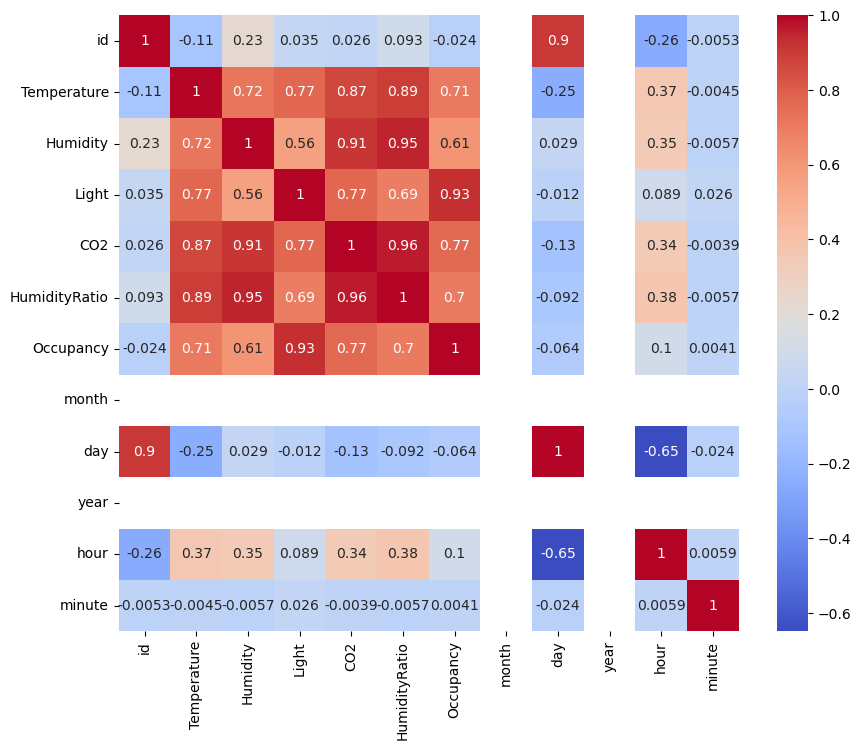

In [45]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [47]:
X = df.drop(columns=['Occupancy'])
y = df['Occupancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=250),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', C=1),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=150),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100)
}

In [51]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.9775
KNN Accuracy: 0.9869
SVM Accuracy: 0.9756
Decision Tree Accuracy: 0.9869
Random Forest Accuracy: 0.9906
Naive Bayes Accuracy: 0.9587
Gradient Boosting Accuracy: 0.9869


In [53]:
df_test = load_data('datatest.csv')
df_test = extract_datetime_features(df_test)
X_test_new = df_test.drop(columns=['Occupancy'])
y_test_new = df_test['Occupancy']